In [79]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data
import acquire
import prepare
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('titanic_df.csv')

- ### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [81]:
df = prepare.prep_titanic(df)

In [82]:
df.drop(columns= ['sex', 'embark_town', 'Unnamed: 0'], inplace = True)
df

,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,1,0,7.2500,0,0,1,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,1,0
3,1,1,1,0,53.1000,0,0,1,0
4,0,3,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,0,1,1
887,1,1,0,0,30.0000,1,0,1,0
888,0,3,1,2,23.4500,0,0,1,0
889,1,1,0,0,30.0000,1,0,0,1


In [83]:
def split_data(df, target=''):
        train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=1349,
                              stratify=df[target])
        train, val = train_test_split(train,
                             train_size = 0.7,
                             random_state=1349,
                             stratify=train[target])
        return train, val, test
    

In [84]:
train, val, test = split_data(df, target='survived')

In [85]:
X_train = train.drop(columns= ['survived'])
y_train = train['survived']

X_val = val.drop(columns= ['survived'])
y_val = val['survived']

X_test = test.drop(columns= ['survived'])
y_test = test['survived']

In [59]:
X_test.head()

,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
769,3,0,0,8.3625,1,0,1,1
341,1,3,2,263.0000,0,0,1,0
464,3,0,0,8.0500,1,0,1,1
195,1,0,0,146.5208,1,0,0,0
321,3,0,0,7.8958,1,0,1,1


In [60]:
seed = 42
tree1 = DecisionTreeClassifier(max_depth = 10, random_state= 42, min_samples_leaf=1)

In [61]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [62]:
y_predictions = tree1.predict(X_train)

In [63]:
y_predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

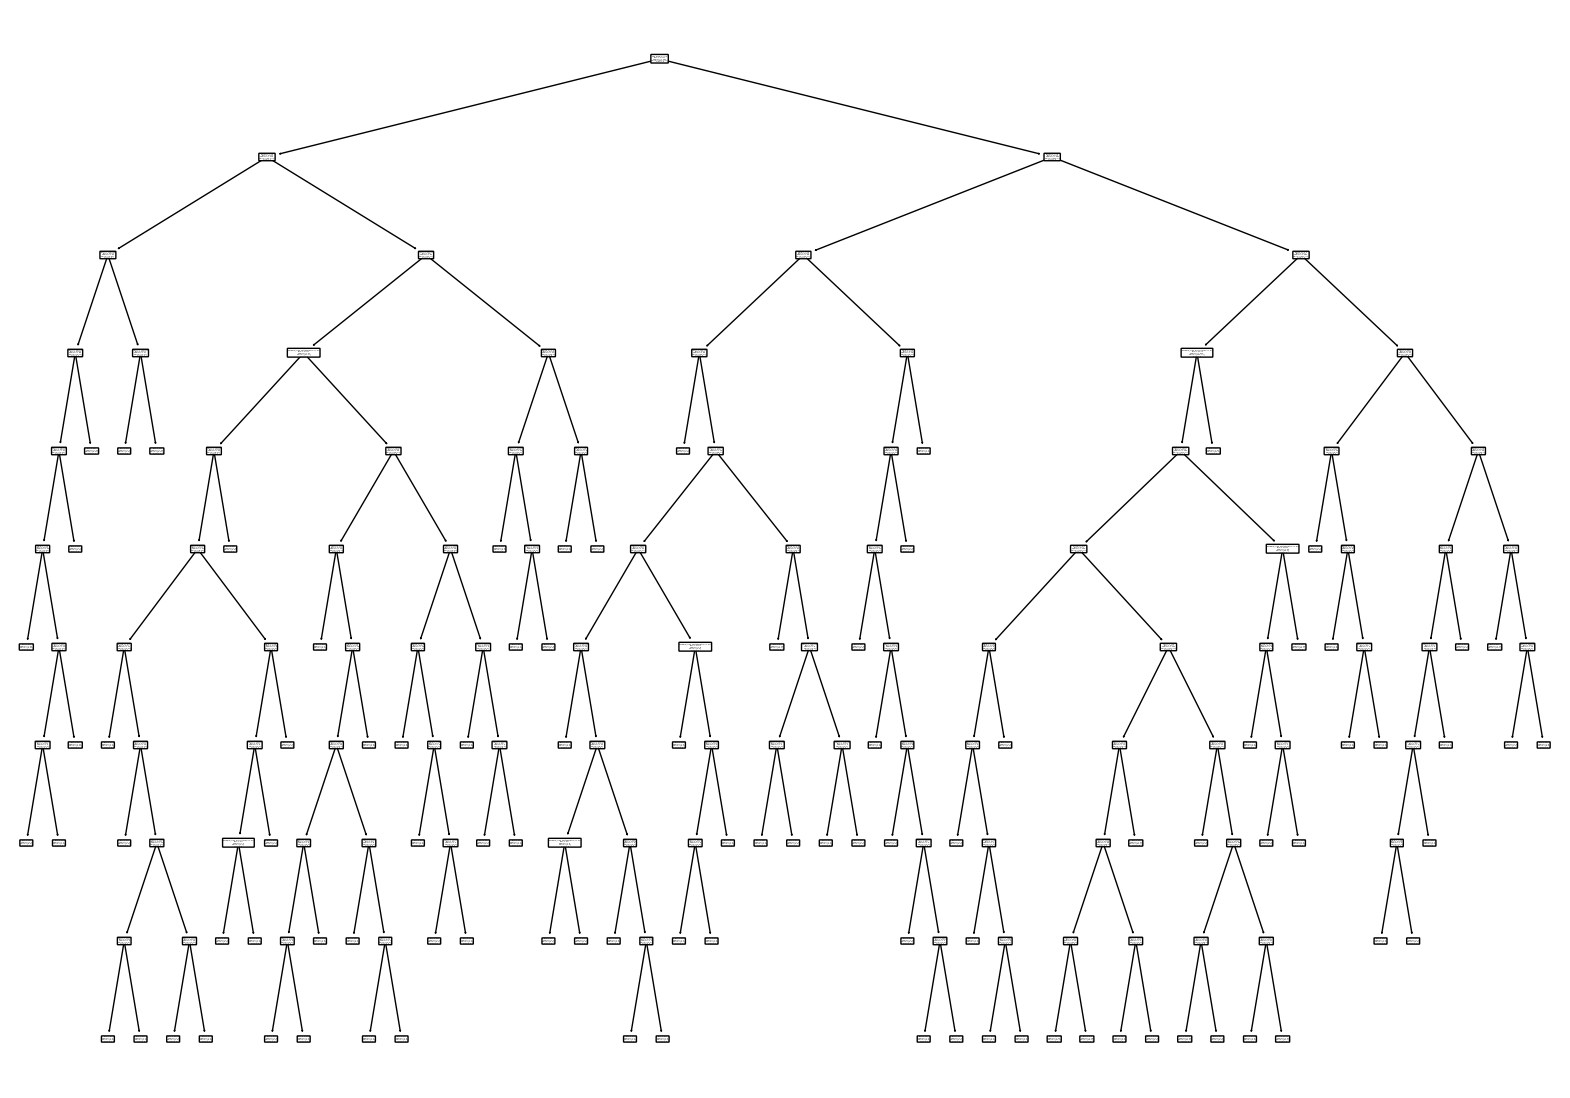

In [64]:
plt.figure(figsize=(20, 14))
plot_tree(tree1, feature_names= X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

In [65]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.93


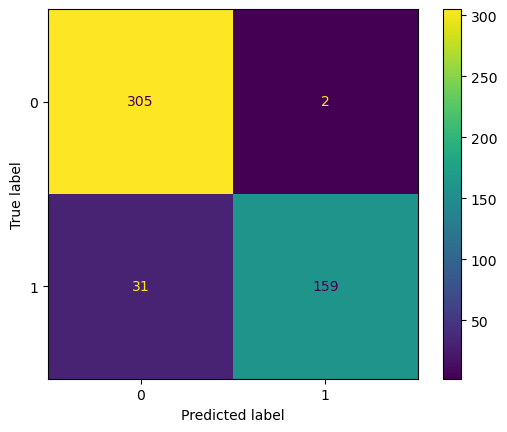

In [68]:
plot_confusion_matrix(tree1, X_train, y_train)

In [69]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       307
           1       0.99      0.84      0.91       190

    accuracy                           0.93       497
   macro avg       0.95      0.92      0.93       497
weighted avg       0.94      0.93      0.93       497



In [86]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, random_state=42)

In [87]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [88]:
print(rf.feature_importances_)

[0.10981398 0.06605444 0.05206778 0.40790486 0.02998305 0.01207656
 0.03117723 0.29092211]


In [75]:
y_pred = rf.predict(X_train)


In [76]:
print(confusion_matrix(y_train, y_predictions))


[[305   2]
 [ 31 159]]


In [89]:
rf.score(X_train, y_train)

0.9396378269617707

In [90]:
print(classification_report(X_train, y_train))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

- ### Evaluate your results using the model score, confusion matrix, and classification report.

- ### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- ### Run through steps increasing your min_samples_leaf and decreasing your max_depth.

- ### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?